In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

RSEED = 50

In [2]:
train = pd.read_csv("data/train_clean.csv")

In [3]:
train['wind_magnitude'] = np.sqrt(train['u_component_of_wind_10m_above_ground']**2 + train['v_component_of_wind_10m_above_ground']**2)

In [4]:
X_train = train[['wind_magnitude']]
y_train = train['target']

# Poisson Regressor

In [5]:
poisson = PoissonRegressor()

poisson.fit(X_train, y_train)

PoissonRegressor()

In [31]:
intercept = poisson.intercept_
slope = poisson.coef_[0]
print(f"Intercept: {intercept}")

# Rate ratio (RR) < 1 implies negative effect of predictor variable X on target 
# a one unit increase in X is associated with a decrease in the rate of target
# the smaller the RR the, the greater the reduction on the rate
print(f"Rate Ratio: {np.exp(slope)}") 


Intercept: 4.521712711153327
Rate Ratio: 0.8641381009099509


In [7]:
y_train_pred = poisson.predict(X_train)

print("RMSE:", mean_squared_error(y_train, y_train_pred, squared=False))
print("R-squared:", r2_score(y_train, y_train_pred).round(3)) #actually not needed for our model

RMSE: 43.81285685269294
R-squared: 0.133


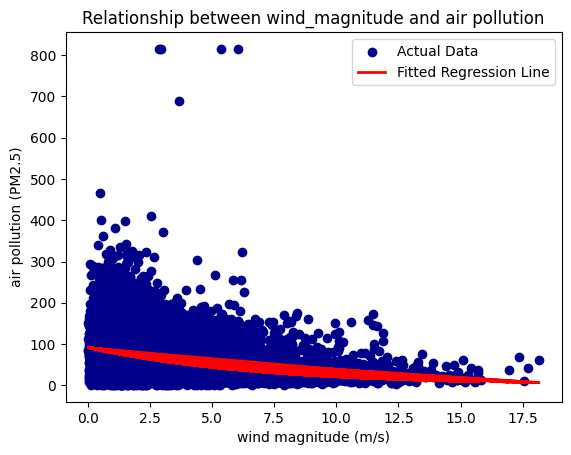

In [37]:
# Visualize the data points and the fitted regression line
plt.scatter(X_train, y_train, label='Actual Data', color='darkblue')
plt.plot(X_train, y_train_pred, label='Fitted Regression Line', color='red', linewidth=2)
plt.title("Relationship between wind_magnitude and air pollution")
plt.xlabel('wind magnitude (m/s)')
plt.ylabel('air pollution (PM2.5)')
plt.legend()
plt.show()

## Poisson Regressor: Evaluation on Test set

In [9]:
test = pd.read_csv("data/test_clean.csv")

In [10]:
test['wind_magnitude'] = np.sqrt(test['u_component_of_wind_10m_above_ground']**2 + test['v_component_of_wind_10m_above_ground']**2)

In [11]:
X_test = test[['wind_magnitude']]
y_test = test['target']

In [12]:
y_test_pred = poisson.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))
print("R-squared:", r2_score(y_test, y_test_pred).round(3)) #actually not needed for our model

RMSE: 42.67659135962818
R-squared: 0.143


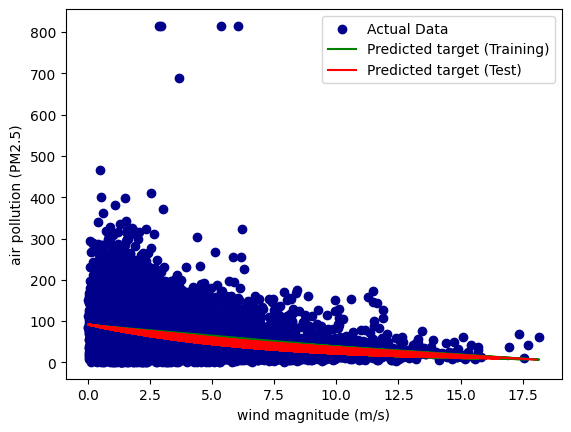

In [35]:
# Visualize the data and the predicted values
plt.scatter(X_train, y_train, label='Actual Data', color='darkblue')
plt.plot(X_train, y_train_pred, label='Predicted target (Training)', color='green')
plt.plot(X_test, y_test_pred, label='Predicted target (Test)', color='red')
plt.xlabel('wind magnitude (m/s)')
plt.ylabel('air pollution (PM2.5)')
plt.legend()
plt.show()

# Linear Regression

In [14]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_intercept = lin_reg.intercept_
lr_slope = lin_reg.coef_[0]
print("Model intercept:", lr_intercept)
print("Coefficient for feature wind:", lr_slope)

Model intercept: 83.6104238640902
Coefficient for feature wind: -7.232361228921643


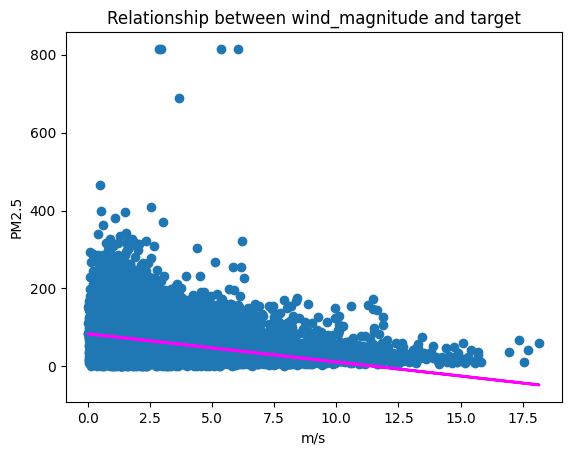

In [16]:
# Plotting our data points
plt.scatter(X_train, y_train)

# Adding the fitted regression line of our model
plt.plot(X_train, X_train*lr_slope +lr_intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between wind_magnitude and target")
plt.ylabel("PM2.5");
plt.xlabel("m/s");

In [17]:
y_train_pred_lr = lin_reg.predict(X_train)

print("RMSE:", mean_squared_error(y_train, y_train_pred_lr, squared=False))
print("R-squared:", r2_score(y_train, y_train_pred_lr).round(3)) #actually not needed for our model but was curious

RMSE: 44.25835056151676
R-squared: 0.115


## Linear Regression: Evaluation on Test set

In [18]:
y_test_pred_lr = lin_reg.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_test_pred_lr, squared=False))
print("R-squared:", r2_score(y_test, y_test_pred_lr).round(3)) #actually not needed for our model but was curious

RMSE: 43.15126453980023
R-squared: 0.123


# Error Analysis

In [19]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

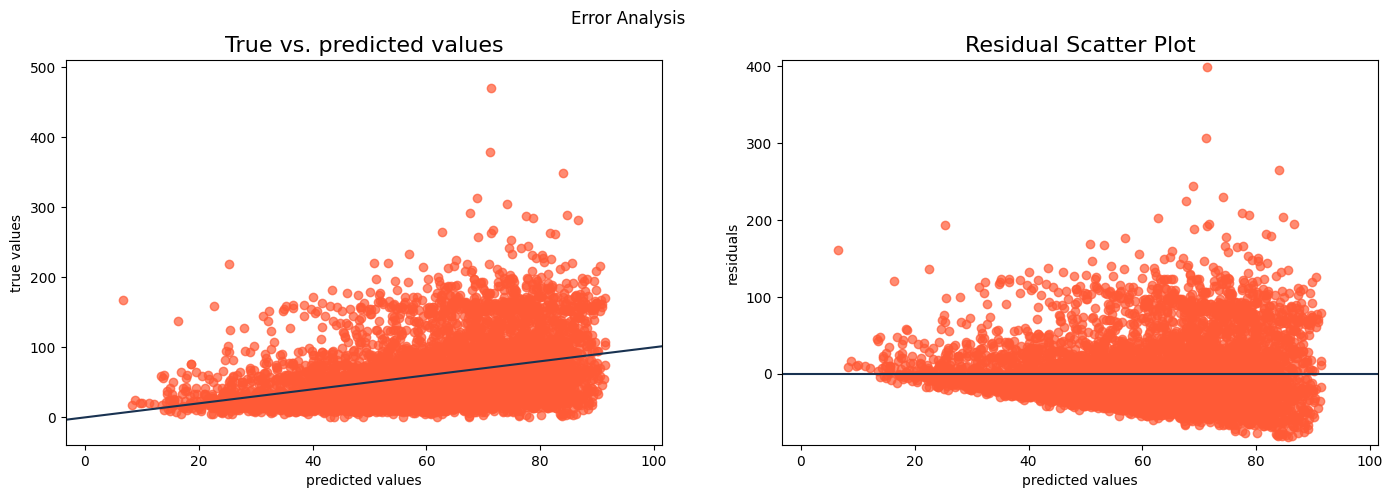

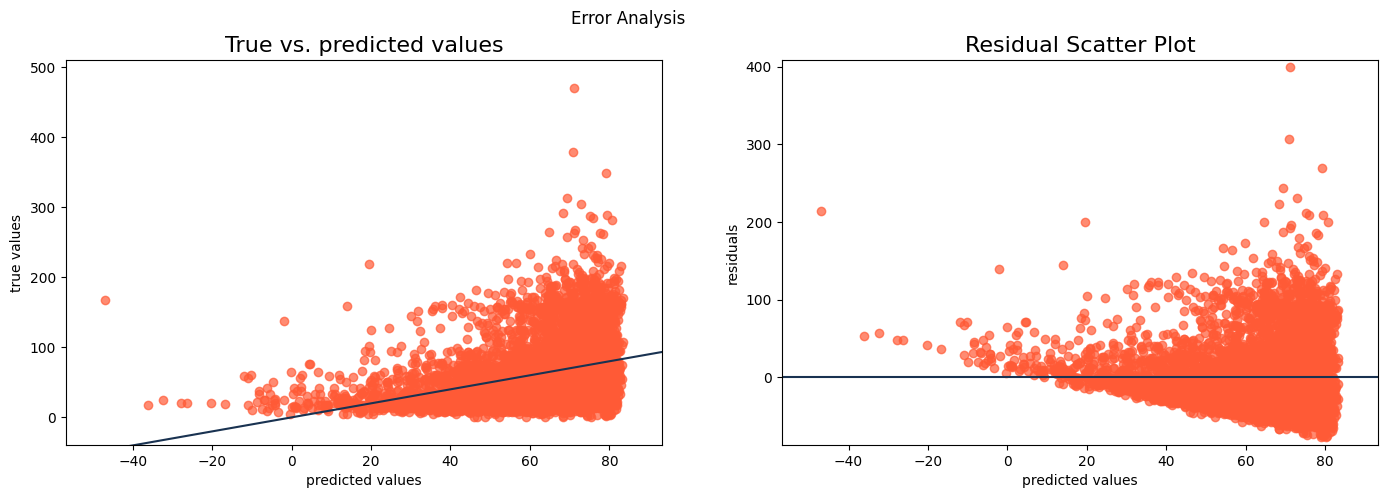

In [20]:
error_analysis(y_test, y_test_pred) #poisson regression
error_analysis(y_test, y_test_pred_lr) #linear regression